# Fourier Series Demo

In [ ]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift, ifftshift
from copy import deepcopy
import matplotlib.pyplot as plt

## Superimposing trig functions

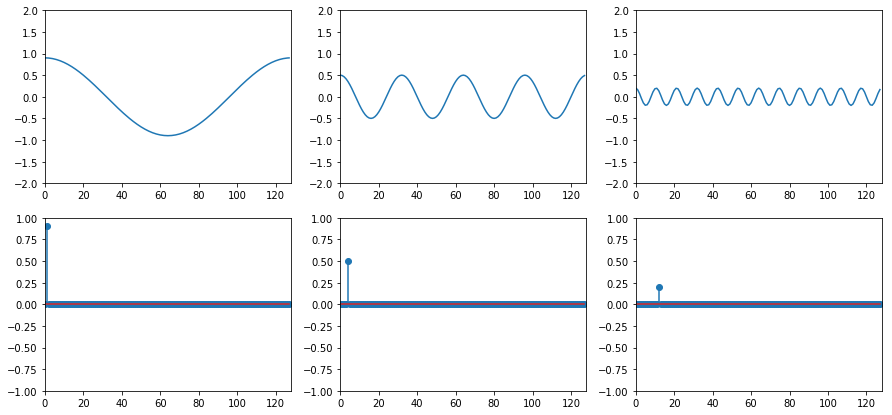

In [9]:
fs = [15,7]
F1 = np.zeros(128); F2 = F1.copy(); F3 = F1.copy()
F1[1] = 0.9
F2[4] = 0.5
F3[12] = 0.2
f1 = ifft(F1)*len(F1); f2 = ifft(F2)*len(F2); f3 = ifft(F3)*len(F3); 
plt.figure(figsize=fs);
plt.subplot(2,3,1); plt.plot(np.real(f1)); plt.axis([0,128,-2,2]);
plt.subplot(2,3,4); plt.stem(F1); plt.axis([0,128,-1,1]);
plt.subplot(2,3,2); plt.plot(np.real(f2)); plt.axis([0,128,-2,2])
plt.subplot(2,3,5); plt.stem(F2); plt.axis([0,128,-1,1]);
plt.subplot(2,3,3); plt.plot(np.real(f3)); plt.axis([0,128,-2,2])
plt.subplot(2,3,6); plt.stem(F3); plt.axis([0,128,-1,1]);

In [ ]:
f = f1 + f2 + f3
F = F1 + F2 + F3
plt.figure(figsize=fs)
plt.subplot(1,2,1); plt.plot(np.real(f)); plt.axis([0,128,-2,2]); plt.xlabel('Time'); plt.title('Signal');
plt.subplot(1,2,2); plt.stem(F); plt.axis([0,128,-1,1]); plt.xlabel('Frequency'); plt.title('Frequencies');

## Let's approximate a function

### A function to work with

In [ ]:
# Create a step function
f = np.zeros(128)
b = 0
f[b:b+64] = 1.
plt.plot(f, 'o-')
plt.title('Step Function')
plt.axis((0, 127, -0.5, 1.5));

### Look at its Fourier coefficients
(actually, it's the log of the modulus of the Fourier coefficients)

In [ ]:
F = np.fft.fft(f)
plt.stem(np.log(np.abs(F)+1));
#plt.stem(np.abs(F));
#plt.stem(F);
plt.title('Modulus of Fourier Coefficients')
plt.ylabel('log Modulus'); plt.xlabel('Index');

In [ ]:
F[13]

In [ ]:
F[0]

### Reconstruction f using more and more Forier coefs

In [ ]:
def PlotSeries(F, m, plotall=False, plotFourier=True):
    '''
     PlotSeries(F, m, plotall=False, plotFourier=True)
     
     Plots a truncated Fourier series using the coefs from -m to m.
     
     If plotall is True, it plots the individual basis functions
     instead of their sum.
     
     If plotFourier is True, it also plots the Fourier coefficients.
    '''
    G = deepcopy(F)
    G[m:-m] = 0  # set all but the first (and last) m to 0
    g = np.fft.ifft(G)  # IDFT
    f = np.fft.ifft(F)  # True function
    plt.figure(figsize=(10,5))
    coefs = min(2*m+1, len(F))
    if plotFourier:
        plt.subplot(1,2,1);
        plt.stem(np.log(np.abs(G)+1));
        plt.title(str(coefs)+' Forier Coefficients');
        plt.subplot(1,2,2);
    plt.plot(np.real(f), '--', color='lightgray');
    if plotall:
        for mm in range(m):
            GG = np.zeros(np.shape(F), dtype=complex)
            GG[mm] = F[mm]
            GG[-mm] = F[-mm]
            gg = np.fft.ifft(GG)
            plt.plot(np.real(gg), color='lightblue');
        plt.plot(np.real(g), linewidth=3);
    else:
        plt.plot(np.real(g));
    plt.title('Approximation with '+str(coefs)+' Coefficients');

In [ ]:
PlotSeries(F, 1)

In [ ]:
PlotSeries(F,9)

In [ ]:
PlotSeries(F, 17)

In [ ]:
PlotSeries(F, 30)

In [ ]:
PlotSeries(F, 50)

In [ ]:
PlotSeries(F, 64)

In [ ]:
PlotSeries(F, 16, plotall=True, plotFourier=False);
plt.title('');
#plt.savefig('FourierSeries.pdf');